In [341]:
import pandas as pd 
import numpy as np 
import xgboost
import os
import time
import warnings
import sklearn
import seaborn as sns 
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt 
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')
file=r'c:/users/lance/desktop/GitHub_project/tianchi_power_data/matrix_0.csv'
weatherfile=r'c:/users/lance/desktop/GitHub_project/tianchi_power_data/weather_data_2014-1-1~2016~9-30.xlsx'
holidayfile=r'c:/users/lance/desktop/GitHub_project/tianchi_power_data/holidays.xlsx'

In [342]:
holidaydata=pd.read_excel(holidayfile,header=None)
data=pd.read_csv(file)
weatherdata=pd.read_excel(weatherfile)
k=['timestamp']
k+=[str(x) for x in range(1,1455)]
k.append('sum')
data.columns=k
data['timestamp']=pd.DataFrame(pd.to_datetime(data['timestamp']))

In [343]:
data['dayofweek']=data['timestamp'].apply(lambda x:x.dayofweek)
data['dayofyear']=data['timestamp'].apply(lambda x:x.dayofyear)
data['is_weekend']=data['timestamp'].apply(lambda x:1 if x.dayofweek in range(5,7) else 0)

In [344]:
data['num_working']=1454
for i in range(0,609):
    data.loc[i,'num_working']=1454-Counter(data.loc[i,][1:1455])[1]

In [345]:
holidaylist=list(holidaydata[0])

In [346]:
data['is_holiday']=data.timestamp.apply(lambda x:1 if x in holidaylist else 0)

In [347]:
# data=pd.merge(left=data,right=weatherdata,left_on='timestamp',right_on='date',how='right')

# pd.get_dummies(data['weather'])

In [348]:
df=data[['timestamp','sum','dayofweek','dayofyear','is_weekend','num_working','is_holiday'#,'max','min','max-min'#
        ]]

In [349]:
df['sum_shift30']=df['sum'].shift(30)

In [350]:
df=df.loc[30:,]

In [367]:
train=df[df.timestamp<r'2016/07/01']
test=df[(df.timestamp>=r'2016/07/01')&(df.timestamp<r'2016/08/01')]

In [368]:
xtrain=train[['sum','dayofweek','dayofyear','is_weekend','num_working','is_holiday']]
ytrain=train[['sum_shift30']]

In [369]:
xtest=test[['sum','dayofweek','dayofyear','is_weekend','num_working','is_holiday']]
ytest=test[['sum_shift30']]

In [370]:
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [373]:
#rfr=RandomForestRegressor(n_estimators=100,verbose=1,random_state=1,max_features=3)
rfr=xgboost.sklearn.XGBRegressor(n_estimators=1000,learning_rate=0.11,gamma=1,base_score=0.7,max_depth=2)
rfr.fit(xtrain,ytrain)

result=rfr.predict(xtest)

res=pd.concat([pd.DataFrame(df[df.timestamp>=r'2016/08/01']['sum']).reset_index(),pd.DataFrame(result)],axis=1)

del res['index']

res.columns=['true','pre']

res['bias']=res['true']-res['pre']
res['mean2']=res['bias']**2
sum(res['mean2'])/len(res)

138478110081.19958

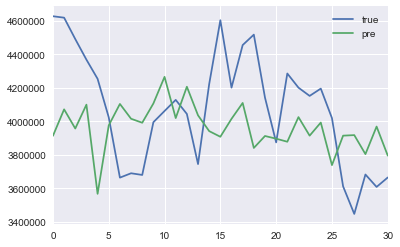

In [374]:
res[['true','pre']].plot()

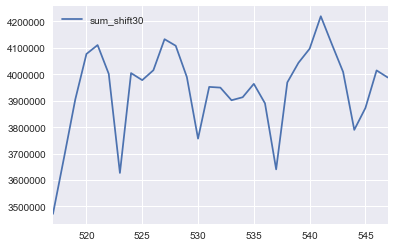

In [364]:
ytest.plot()